In [ ]:
"""
# BERT Embedding Visualization in 3D
This project demonstrates how to visualize BERT (Bidirectional Encoder Representations from Transformers)
embeddings using 3D interactive plots. It utilizes the `transformers` library to fetch pre-trained BERT model
embeddings and `plotly` for interactive 3D visualization.

## Overview

BERT embeddings provide a powerful method for understanding textual data, capturing contextual relationships
between words in a way that simpler models cannot. This notebook aims to provide a visual insight into
these embeddings, allowing for an interactive exploration of their dimensional characteristics.
"""
%pip install -q transformers scikit-learn plotly

Note: you may need to restart the kernel to use updated packages.


In [43]:
import torch
from transformers import BertModel, BertTokenizer
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased')

# Encode text
text = """
The king rules the kingdom with wisdom and strength.
A queen loves the king and supports his decisions.
They hold court in a grand palace filled with nobles.
The heir to the throne studies the laws of the land.
Royal decrees are announced with great ceremony.
A man drives the car through the bustling city streets.
A woman rides the bicycle along the scenic river path.
He parks his car outside the office every morning.
She wears a helmet for safety while pedaling uphill.
Public transportation is used by everyone during rush hours.
An apple is a sweet fruit loved by many.
An orange is a citrus fruit rich in vitamin C.
Trees bearing fruit require years of careful tending.
Fruits are harvested in the fall when they ripen.
Orchards become busy with pickers and baskets.
"""

text_lines = text.split('\n')

tokens = {txt: tokenizer(txt, return_tensors='pt', padding=True, truncation=True) for txt in text_lines}

# Extract embeddings
with torch.no_grad():
    embeddings = {txt: model(**tokens[txt])[0][:, 0, :].numpy() for txt in text_lines}  # Use the [CLS] token

# Collect all embeddings into one matrix for PCA
all_embeddings = np.array([embeddings[txt].flatten() for txt in text_lines])

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Plotting using plotly for interactive 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings[:, 0],
    y=reduced_embeddings[:, 1],
    z=reduced_embeddings[:, 2],
    mode='markers+text',
    text=text_lines,
    marker=dict(
        size=5,
        color=np.linspace(0, 1, len(reduced_embeddings)),  # Color by position along the array
        colorscale='Viridis',  # Change this for different color schemes
        opacity=0.8
    ),
    textposition='top center'
)])

fig.update_layout(
    height=1000,
    title_text='BERT Contextual Embeddings Visualized in 3D',
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3',
        xaxis=dict(range=[-7, 2]),  # Adjust x-axis range
        yaxis=dict(range=[-10, 10]),  # Adjust y-axis range
        zaxis=dict(range=[-5, 5])   # Adjust z-axis range
    )
)

fig.show()


[['', 'the king rules the kingdom with wisdom and strength.', 'a queen loves the king and supports his decisions.', 'they hold court in a grand palace filled with nobles.', 'the heir to the throne studies the laws of the land.', 'royal decrees are announced with great ceremony.', 'a man drives the car through the bustling city streets.', 'a woman rides the bicycle along the scenic river path.', 'he parks his car outside the office every morning.', 'she wears a helmet for safety while pedaling uphill.', 'public transportation is used by everyone during rush hours.', 'an apple is a sweet fruit loved by many.', 'an orange is a citrus fruit rich in vitamin c.', 'trees bearing fruit require years of careful tending.', 'fruits are harvested in the fall when they ripen.', 'orchards become busy with pickers and baskets.', '']]


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



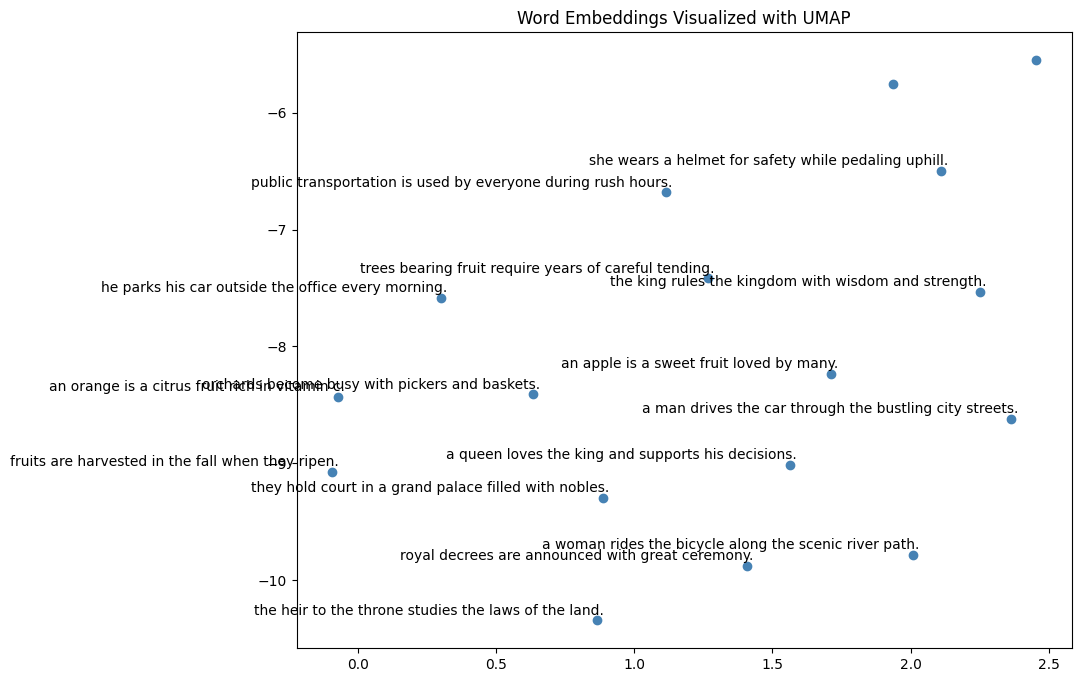

In [44]:
# %pip install -q umap-learn
import umap
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

# Prepare data for Word2Vec: each sentence as a list of words
sentences = [sentence.lower().split('\n') for sentence in [text] if sentence]
print(sentences)
# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, workers=4)

# Extract the word vectors
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Dimensionality reduction with UMAP
embedding = umap.UMAP(n_neighbors=4, min_dist=0.3, random_state=42).fit_transform(all_embeddings)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c='steelblue')
for i, word in enumerate(words):
    if i < len(embedding):
        plt.annotate(word, xy=(embedding[i, 0], embedding[i, 1]), xytext=(5, 2),
                    textcoords='offset points', ha='right', va='bottom')
plt.title('Word Embeddings Visualized with UMAP')
plt.show()